In [3]:
import warnings
warnings.filterwarnings('ignore')

import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import time
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [4]:
URL="https://www.flipkart.com/search?q=air+conditioners&sid=j9e%2Cabm%2Cc54&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_3_na_na_ps&otracker1=AS_QueryStore_OrganicAutoSuggest_1_3_na_na_ps&as-pos=1&as-type=HISTORY&suggestionId=air+conditioners%7CAir+Conditioners&requestId=a2bbdff8-221c-418d-acf8-1276341845d9"

In [948]:
Page=requests.get(URL)

In [949]:
Page.status_code

200

In [951]:
Pagecontent=Page.text

In [952]:
soup=BeautifulSoup(Pagecontent)

## Web-Scraping The Air Conditioners Data through the Website

In [956]:

AC_Name = [] 
Price = []
Rating = []
Specifications = []
pagenum = []
for i in range(1,20): 
    start_time = time.time()
    URL="https://www.flipkart.com/search?q=air+conditioners&sid=j9e%2Cabm%2Cc54&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_3_na_na_ps&otracker1=AS_QueryStore_OrganicAutoSuggest_1_3_na_na_ps&as-pos=1&as-type=HISTORY&suggestionId=air+conditioners%7CAir+Conditioners&requestId=a2bbdff8-221c-418d-acf8-1276341845d9&page={}".format(i)
    page = requests.get(URL)
    pagecontent = page.text
    soup = BeautifulSoup(pagecontent)

    for x in soup.find_all('div', attrs={'class':'_3pLy-c row'}):
        n= x.find('div', attrs = {'class':'_4rR01T'})
        p= x.find('div', attrs = {'class':'_30jeq3 _1_WHN1'})
        R = x.find('div', attrs = {'class':'_3LWZlK'})
        f= x.find('div', attrs = {'class':'fMghEO'})
        
        if n is None:
            AC_Name.append(np.NaN)
        else:
            AC_Name.append(n.text)
            
        if p is None:
            Price.append(np.NaN)
        else:
            Price.append(p.text)
            
        if R is None:
            Rating.append(np.NaN)
        else:
            Rating.append(R.text)
            
        if f is None:
            Specifications.append(np.NaN)
        else:
            Specifications.append(f.text)
            
        pagenum.append(i)
    print('Page {} completed in {} seconds'.format(i, time.time()-start_time))
   

Page 1 completed in 0.6381089687347412 seconds
Page 2 completed in 0.5574245452880859 seconds
Page 3 completed in 0.6474089622497559 seconds
Page 4 completed in 0.6599900722503662 seconds
Page 5 completed in 0.5141201019287109 seconds
Page 6 completed in 0.5507454872131348 seconds
Page 7 completed in 0.5688588619232178 seconds
Page 8 completed in 0.5055506229400635 seconds
Page 9 completed in 0.5258705615997314 seconds
Page 10 completed in 0.46114540100097656 seconds
Page 11 completed in 1.4985718727111816 seconds
Page 12 completed in 0.6827061176300049 seconds
Page 13 completed in 0.5148355960845947 seconds
Page 14 completed in 0.47760748863220215 seconds
Page 15 completed in 0.5588595867156982 seconds
Page 16 completed in 0.502779483795166 seconds
Page 17 completed in 0.5142087936401367 seconds
Page 18 completed in 0.5721035003662109 seconds
Page 19 completed in 0.5495197772979736 seconds


In [957]:
#Finding the len of each List
len(AC_Name)
len(Price)
len(Rating)
len(Specifications)

456

456

456

456

In [958]:
#creating a DataFrame
ac=pd.DataFrame({"Model":AC_Name,"Price":Price,"Rating":Rating,"Specs":Specifications})

In [959]:
ac.head()

,Model,Price,Rating,Specs
0,CARRIER 1.2 Ton 5 Star Split Inverter AC - White,"₹33,990",4.2,Condenser Coil: CopperPower Consumption: 1050 ...
1,CARRIER 4 in 1 Convertible Cooling 1.5 Ton 5 S...,"₹39,990",4.2,Condenser Coil: CopperPower Consumption: 1500 ...
2,SAMSUNG 1.5 Ton 3 Star Split Inverter AC - Wh...,"₹29,990",4.2,Condenser Coil: CopperPower Consumption: 1748 ...
3,Midea 1 Ton 3 Star Split AC - White,"₹21,990",4.3,Condenser Coil: CopperPower Consumption: 980 W...
4,MarQ By Flipkart 1 Ton 3 Star Split Inverter A...,"₹20,990",4.3,Condenser Coil: CopperPower Consumption: 1110 ...


In [960]:

regex="^\w+"
re.findall(regex,ac["Model"][0])

['CARRIER']

In [961]:
# Creating a Brand column
regex="^\w+"
ac["Brand"]=ac["Model"].apply(lambda x:" ".join(re.compile(regex).findall(x)))

In [962]:

b=[]
for i in ac["Brand"]:
    if(i=="Blue"):
        b.append("Blue Star")
    elif(i=="O"):
        b.append("O-General")
    else:
        b.append(i)
        

In [963]:
ac["Brand"]=b

In [964]:
ac.head()

,Model,Price,Rating,Specs,Brand
0,CARRIER 1.2 Ton 5 Star Split Inverter AC - White,"₹33,990",4.2,Condenser Coil: CopperPower Consumption: 1050 ...,CARRIER
1,CARRIER 4 in 1 Convertible Cooling 1.5 Ton 5 S...,"₹39,990",4.2,Condenser Coil: CopperPower Consumption: 1500 ...,CARRIER
2,SAMSUNG 1.5 Ton 3 Star Split Inverter AC - Wh...,"₹29,990",4.2,Condenser Coil: CopperPower Consumption: 1748 ...,SAMSUNG
3,Midea 1 Ton 3 Star Split AC - White,"₹21,990",4.3,Condenser Coil: CopperPower Consumption: 980 W...,Midea
4,MarQ By Flipkart 1 Ton 3 Star Split Inverter A...,"₹20,990",4.3,Condenser Coil: CopperPower Consumption: 1110 ...,MarQ


In [965]:
#Converting Price column from Object to Float 
ac["Price"]=ac["Price"].apply(lambda x:x.replace("₹","").replace(",","")).astype(float)

In [966]:
ac.head()

,Model,Price,Rating,Specs,Brand
0,CARRIER 1.2 Ton 5 Star Split Inverter AC - White,33990.0,4.2,Condenser Coil: CopperPower Consumption: 1050 ...,CARRIER
1,CARRIER 4 in 1 Convertible Cooling 1.5 Ton 5 S...,39990.0,4.2,Condenser Coil: CopperPower Consumption: 1500 ...,CARRIER
2,SAMSUNG 1.5 Ton 3 Star Split Inverter AC - Wh...,29990.0,4.2,Condenser Coil: CopperPower Consumption: 1748 ...,SAMSUNG
3,Midea 1 Ton 3 Star Split AC - White,21990.0,4.3,Condenser Coil: CopperPower Consumption: 980 W...,Midea
4,MarQ By Flipkart 1 Ton 3 Star Split Inverter A...,20990.0,4.3,Condenser Coil: CopperPower Consumption: 1110 ...,MarQ


In [967]:
#Creating Capacity column
regex="(?:[\d.\s]+|[0-9\s]+)\s+Ton"
ac["Capacity"]=ac["Model"].apply(lambda x:"".join(re.compile(regex).findall(x)))

In [968]:
ca=[]
for i in ac["Capacity"]:
    if(i==""):
        ca.append(np.nan)
    else:
        ca.append(i)

In [969]:
ac["Capacity"]=ca

In [970]:
#Creating Power Consumption column
regex="(?:[\d.]+|[\d]+)\s+(?:kWh|W)"
ac["Power Consumption"]=ac["Specs"].apply(lambda x:"".join(re.compile(regex).findall(x)))

In [971]:
pc=[]
for i in ac["Power Consumption"]:
    if(i==""):
        pc.append(np.nan)
    else:
        pc.append(i)

In [972]:
ac["Power Consumption"]=pc

In [973]:
ac.head()

,Model,Price,Rating,Specs,Brand,Capacity,Power Consumption
0,CARRIER 1.2 Ton 5 Star Split Inverter AC - White,33990.0,4.2,Condenser Coil: CopperPower Consumption: 1050 ...,CARRIER,1.2 Ton,1050 W
1,CARRIER 4 in 1 Convertible Cooling 1.5 Ton 5 S...,39990.0,4.2,Condenser Coil: CopperPower Consumption: 1500 ...,CARRIER,1.5 Ton,1500 W
2,SAMSUNG 1.5 Ton 3 Star Split Inverter AC - Wh...,29990.0,4.2,Condenser Coil: CopperPower Consumption: 1748 ...,SAMSUNG,1.5 Ton,1748 W
3,Midea 1 Ton 3 Star Split AC - White,21990.0,4.3,Condenser Coil: CopperPower Consumption: 980 W...,Midea,1 Ton,980 W
4,MarQ By Flipkart 1 Ton 3 Star Split Inverter A...,20990.0,4.3,Condenser Coil: CopperPower Consumption: 1110 ...,MarQ,1 Ton,1110 W


In [974]:
regex="Copper"
re.findall(regex,ac["Specs"][190])

['Copper']

In [975]:
# Creating Condenser Coil
regex="Copper"
ac["Condenser Coil"]=ac["Specs"].apply(lambda x:"".join(re.compile(regex).findall(x)))

In [976]:
cc=[]
for i in ac["Condenser Coil"]:
    if(i==""):
        cc.append(np.nan)
    else:
        cc.append(i)

In [977]:
ac["Condenser Coil"]=cc

In [978]:
ac.head()

,Model,Price,Rating,Specs,Brand,Capacity,Power Consumption,Condenser Coil
0,CARRIER 1.2 Ton 5 Star Split Inverter AC - White,33990.0,4.2,Condenser Coil: CopperPower Consumption: 1050 ...,CARRIER,1.2 Ton,1050 W,Copper
1,CARRIER 4 in 1 Convertible Cooling 1.5 Ton 5 S...,39990.0,4.2,Condenser Coil: CopperPower Consumption: 1500 ...,CARRIER,1.5 Ton,1500 W,Copper
2,SAMSUNG 1.5 Ton 3 Star Split Inverter AC - Wh...,29990.0,4.2,Condenser Coil: CopperPower Consumption: 1748 ...,SAMSUNG,1.5 Ton,1748 W,Copper
3,Midea 1 Ton 3 Star Split AC - White,21990.0,4.3,Condenser Coil: CopperPower Consumption: 980 W...,Midea,1 Ton,980 W,Copper
4,MarQ By Flipkart 1 Ton 3 Star Split Inverter A...,20990.0,4.3,Condenser Coil: CopperPower Consumption: 1110 ...,MarQ,1 Ton,1110 W,Copper


In [995]:
ac["Specs"][4]

'Condenser Coil: CopperPower Consumption: 1110 WNoise level: 32.5 dbRefrigerant: R-32Wi-Fi Enabled: No1 Year on Product and 5 Years on Compressor'

In [996]:
regex="(?:[\d\s]|[\d.\s])+(?:dB|db)"
re.findall(regex,ac["Specs"][4])

[' 32.5 db']

In [1002]:
#Creating Noise level column
regex="(?:[\d\s]|[\d.\s])+(?:dB|db)"
ac["Noise Level"]=ac["Specs"].apply(lambda x:" ".join(re.compile(regex).findall(x)))

In [1003]:
N=[]
for i in ac["Noise Level"]:
    if(i==""):
        N.append(np.nan)
    else:
        N.append(i)

In [1004]:
ac["Noise Level"]=N

In [1005]:
ac.head()

,Model,Price,Rating,Specs,Brand,Capacity,Power Consumption,Condenser Coil,Noise Level
0,CARRIER 1.2 Ton 5 Star Split Inverter AC - White,33990.0,4.2,Condenser Coil: CopperPower Consumption: 1050 ...,CARRIER,1.2 Ton,1050 W,Copper,32 dB
1,CARRIER 4 in 1 Convertible Cooling 1.5 Ton 5 S...,39990.0,4.2,Condenser Coil: CopperPower Consumption: 1500 ...,CARRIER,1.5 Ton,1500 W,Copper,38 dB
2,SAMSUNG 1.5 Ton 3 Star Split Inverter AC - Wh...,29990.0,4.2,Condenser Coil: CopperPower Consumption: 1748 ...,SAMSUNG,1.5 Ton,1748 W,Copper,52 dB
3,Midea 1 Ton 3 Star Split AC - White,21990.0,4.3,Condenser Coil: CopperPower Consumption: 980 W...,Midea,1 Ton,980 W,Copper,39 dB
4,MarQ By Flipkart 1 Ton 3 Star Split Inverter A...,20990.0,4.3,Condenser Coil: CopperPower Consumption: 1110 ...,MarQ,1 Ton,1110 W,Copper,32.5 db


In [864]:
ac["Specs"][1]

'Condenser Coil: CopperPower Consumption: 1050 WNoise level: 32 dBRefrigerant: R32Wi-Fi Enabled: No1 Year Warranty on Product and 10 Years on Compressor from Carrier'

In [1006]:
regex="(?:\w:\s)+(Yes|yes|No|no)"
re.findall(regex,ac["Specs"][100])

['No']

In [1007]:
#Creating Wi-fi column
regex="(?:\w:\s)+(Yes|yes|No|no)"
ac["Wi-Fi"]=ac["Specs"].apply(lambda x:"".join(re.compile(regex).findall(x)))

In [1008]:
wi=[]
for i in ac["Wi-Fi"]:
    if(i==""):
        wi.append(np.nan)
    else:
        wi.append(i)

In [1009]:
ac["Wi-Fi"]=wi

In [1010]:
ac.head()

,Model,Price,Rating,Specs,Brand,Capacity,Power Consumption,Condenser Coil,Noise Level,Wi-Fi
0,CARRIER 1.2 Ton 5 Star Split Inverter AC - White,33990.0,4.2,Condenser Coil: CopperPower Consumption: 1050 ...,CARRIER,1.2 Ton,1050 W,Copper,32 dB,No
1,CARRIER 4 in 1 Convertible Cooling 1.5 Ton 5 S...,39990.0,4.2,Condenser Coil: CopperPower Consumption: 1500 ...,CARRIER,1.5 Ton,1500 W,Copper,38 dB,No
2,SAMSUNG 1.5 Ton 3 Star Split Inverter AC - Wh...,29990.0,4.2,Condenser Coil: CopperPower Consumption: 1748 ...,SAMSUNG,1.5 Ton,1748 W,Copper,52 dB,No
3,Midea 1 Ton 3 Star Split AC - White,21990.0,4.3,Condenser Coil: CopperPower Consumption: 980 W...,Midea,1 Ton,980 W,Copper,39 dB,No
4,MarQ By Flipkart 1 Ton 3 Star Split Inverter A...,20990.0,4.3,Condenser Coil: CopperPower Consumption: 1110 ...,MarQ,1 Ton,1110 W,Copper,32.5 db,No


In [870]:
ac["Model"][0]

'CARRIER 4 in 1 Convertible Cooling 1.5 Ton 5 Star Split Inverter AC  - White'

In [871]:
ac["Model"][1]

'CARRIER 1.2 Ton 5 Star Split Inverter AC  - White'

In [1011]:
#Creating Energy Saving column
regex="[\d\s]+Star"
ac["Energy Saving"]=ac["Model"].apply(lambda x:"".join(re.compile(regex).findall(x)))

In [1012]:
es=[]
for i in ac["Energy Saving"]:
    if(i==""):
        es.append(np.nan)
    else:
        es.append(i)

In [1013]:
ac["Energy Saving"]=es

In [1014]:
Es=[]
for i in ac["Energy Saving"]:
    if(i==" Star 2 Star"):
        Es.append(" 2 Star")
        
    elif(i==" Star 3 Star"):
        Es.append(" 3 Star")
    
    elif(i==" Star 4 Star"):
        Es.append(" 4 Star")
     
    elif(i==" Star 5 Star"):
        Es.append(" 5 Star")
    else:
        Es.append(i)

In [1015]:
ac["Energy Saving"]=Es

In [1016]:
e=[]
for i in ac["Energy Saving"]:
    if(i==" 5 Star"):
        e.append("5 Star")
    else:
        e.append(i)

In [1017]:
ac["Energy Saving"]=e

In [1019]:
ac["Energy Saving"].unique()

array(['5 Star', ' 3 Star', ' 4 Star', nan, ' 2 Star'], dtype=object)

In [1020]:
ac["Specs"][0]

'Condenser Coil: CopperPower Consumption: 1050 WNoise level: 32 dBRefrigerant: R32Wi-Fi Enabled: No1 Year Warranty on Product and 10 Years on Compressor from Carrier'

In [1021]:
#Creating Compressor Warranty
regex="[\d\s]+(?:Years|years)\s[\w\s]+(?:Compressor|compressor)"
ac["Compressor_Warranty"]=ac["Specs"].apply(lambda x:"".join(re.compile(regex).findall(x)))

In [1022]:
cw=[]
for i in ac["Compressor_Warranty"]:
    if(i==""):
        cw.append(np.nan)
    else:
        cw.append(i)

In [1023]:
 ac["Compressor_Warranty"]=cw

In [1024]:
ac.head()

,Model,Price,Rating,Specs,Brand,Capacity,Power Consumption,Condenser Coil,Noise Level,Wi-Fi,Energy Saving,Compressor_Warranty
0,CARRIER 1.2 Ton 5 Star Split Inverter AC - White,33990.0,4.2,Condenser Coil: CopperPower Consumption: 1050 ...,CARRIER,1.2 Ton,1050 W,Copper,32 dB,No,5 Star,10 Years on Compressor
1,CARRIER 4 in 1 Convertible Cooling 1.5 Ton 5 S...,39990.0,4.2,Condenser Coil: CopperPower Consumption: 1500 ...,CARRIER,1.5 Ton,1500 W,Copper,38 dB,No,5 Star,2 Years on PCB and 10 Years on Compressor
2,SAMSUNG 1.5 Ton 3 Star Split Inverter AC - Wh...,29990.0,4.2,Condenser Coil: CopperPower Consumption: 1748 ...,SAMSUNG,1.5 Ton,1748 W,Copper,52 dB,No,3 Star,10 years on Compressor
3,Midea 1 Ton 3 Star Split AC - White,21990.0,4.3,Condenser Coil: CopperPower Consumption: 980 W...,Midea,1 Ton,980 W,Copper,39 dB,No,3 Star,5 Years on Compressor
4,MarQ By Flipkart 1 Ton 3 Star Split Inverter A...,20990.0,4.3,Condenser Coil: CopperPower Consumption: 1110 ...,MarQ,1 Ton,1110 W,Copper,32.5 db,No,3 Star,5 Years on Compressor


In [884]:
ac["Specs"][2]

'Condenser Coil: CopperPower Consumption: 1748 WNoise level: 52 dBWi-Fi Enabled: No1 Year comprehensive and 10 years on Compressor'

In [1025]:
#Creating Color column
regex="(?:\-)(\s\w+)"
ac["color"]=ac["Model"].apply(lambda x:"".join(re.compile(regex).findall(x)))

In [1026]:
c=[]
for i in ac["color"]:
    if(i==""):
        c.append(np.nan)
    else:
        c.append(i)

In [1027]:
ac["color"]=c

In [1028]:
ac.head()

,Model,Price,Rating,Specs,Brand,Capacity,Power Consumption,Condenser Coil,Noise Level,Wi-Fi,Energy Saving,Compressor_Warranty,color
0,CARRIER 1.2 Ton 5 Star Split Inverter AC - White,33990.0,4.2,Condenser Coil: CopperPower Consumption: 1050 ...,CARRIER,1.2 Ton,1050 W,Copper,32 dB,No,5 Star,10 Years on Compressor,White
1,CARRIER 4 in 1 Convertible Cooling 1.5 Ton 5 S...,39990.0,4.2,Condenser Coil: CopperPower Consumption: 1500 ...,CARRIER,1.5 Ton,1500 W,Copper,38 dB,No,5 Star,2 Years on PCB and 10 Years on Compressor,White
2,SAMSUNG 1.5 Ton 3 Star Split Inverter AC - Wh...,29990.0,4.2,Condenser Coil: CopperPower Consumption: 1748 ...,SAMSUNG,1.5 Ton,1748 W,Copper,52 dB,No,3 Star,10 years on Compressor,White
3,Midea 1 Ton 3 Star Split AC - White,21990.0,4.3,Condenser Coil: CopperPower Consumption: 980 W...,Midea,1 Ton,980 W,Copper,39 dB,No,3 Star,5 Years on Compressor,White
4,MarQ By Flipkart 1 Ton 3 Star Split Inverter A...,20990.0,4.3,Condenser Coil: CopperPower Consumption: 1110 ...,MarQ,1 Ton,1110 W,Copper,32.5 db,No,3 Star,5 Years on Compressor,White


In [1029]:
regex="(Split|Window|split|window)"
ac["Type"]=ac["Model"].apply(lambda x:"".join(re.compile(regex).findall(x)))

In [1030]:
T=[]
for i in ac["Type"]:
    if(i==""):
        T.append(np.nan)
    else:
        T.append(i)

In [1031]:
ac["Type"]=T

In [1032]:
ac.head()

,Model,Price,Rating,Specs,Brand,Capacity,Power Consumption,Condenser Coil,Noise Level,Wi-Fi,Energy Saving,Compressor_Warranty,color,Type
0,CARRIER 1.2 Ton 5 Star Split Inverter AC - White,33990.0,4.2,Condenser Coil: CopperPower Consumption: 1050 ...,CARRIER,1.2 Ton,1050 W,Copper,32 dB,No,5 Star,10 Years on Compressor,White,Split
1,CARRIER 4 in 1 Convertible Cooling 1.5 Ton 5 S...,39990.0,4.2,Condenser Coil: CopperPower Consumption: 1500 ...,CARRIER,1.5 Ton,1500 W,Copper,38 dB,No,5 Star,2 Years on PCB and 10 Years on Compressor,White,Split
2,SAMSUNG 1.5 Ton 3 Star Split Inverter AC - Wh...,29990.0,4.2,Condenser Coil: CopperPower Consumption: 1748 ...,SAMSUNG,1.5 Ton,1748 W,Copper,52 dB,No,3 Star,10 years on Compressor,White,Split
3,Midea 1 Ton 3 Star Split AC - White,21990.0,4.3,Condenser Coil: CopperPower Consumption: 980 W...,Midea,1 Ton,980 W,Copper,39 dB,No,3 Star,5 Years on Compressor,White,Split
4,MarQ By Flipkart 1 Ton 3 Star Split Inverter A...,20990.0,4.3,Condenser Coil: CopperPower Consumption: 1110 ...,MarQ,1 Ton,1110 W,Copper,32.5 db,No,3 Star,5 Years on Compressor,White,Split


In [1033]:
ac.isnull().sum()

Model                   0
Price                   0
Rating                 47
Specs                   0
Brand                   0
Capacity                0
Power Consumption      27
Condenser Coil         36
Noise Level            30
Wi-Fi                   1
Energy Saving          12
Compressor_Warranty    51
color                   0
Type                    2
dtype: int64

In [1035]:
ac.dtypes

Model                   object
Price                  float64
Rating                  object
Specs                   object
Brand                   object
Capacity                object
Power Consumption       object
Condenser Coil          object
Noise Level             object
Wi-Fi                   object
Energy Saving           object
Compressor_Warranty     object
color                   object
Type                    object
dtype: object

### Filling Null Values with Statistical methods for categorical and numerical values

In [1036]:
#Changing Rating column from Object to float
ac["Rating"]=(ac["Rating"]).astype(float)

In [1037]:
A=ac["Rating"].mean()

In [1038]:
A

4.235696821515888

In [1039]:
#Rounding mean value
B=round(A,1)

In [1040]:
B

4.2

In [1041]:
ac["Rating"]=ac["Rating"].fillna(B)

In [1042]:

ac["Power Consumption"]=ac["Power Consumption"].fillna(ac["Power Consumption"].mode()[0])

In [1043]:
ac["Condenser Coil"]=ac["Condenser Coil"].fillna(ac["Condenser Coil"].mode()[0])

In [1044]:
ac["Noise Level"]=ac["Noise Level"].fillna(ac["Noise Level"].mode()[0])

In [1045]:
ac["Wi-Fi"]=ac["Wi-Fi"].fillna(ac["Wi-Fi"].mode()[0])

In [1046]:
ac["Energy Saving"]=ac["Energy Saving"].fillna(ac["Energy Saving"].mode()[0])

In [1047]:
ac["Compressor_Warranty"]=ac["Compressor_Warranty"].fillna(ac["Compressor_Warranty"].mode()[0])

In [1048]:
ac["Type"]=ac["Type"].fillna(ac["Type"].mode()[0])

In [1049]:
ac.head()

,Model,Price,Rating,Specs,Brand,Capacity,Power Consumption,Condenser Coil,Noise Level,Wi-Fi,Energy Saving,Compressor_Warranty,color,Type
0,CARRIER 1.2 Ton 5 Star Split Inverter AC - White,33990.0,4.2,Condenser Coil: CopperPower Consumption: 1050 ...,CARRIER,1.2 Ton,1050 W,Copper,32 dB,No,5 Star,10 Years on Compressor,White,Split
1,CARRIER 4 in 1 Convertible Cooling 1.5 Ton 5 S...,39990.0,4.2,Condenser Coil: CopperPower Consumption: 1500 ...,CARRIER,1.5 Ton,1500 W,Copper,38 dB,No,5 Star,2 Years on PCB and 10 Years on Compressor,White,Split
2,SAMSUNG 1.5 Ton 3 Star Split Inverter AC - Wh...,29990.0,4.2,Condenser Coil: CopperPower Consumption: 1748 ...,SAMSUNG,1.5 Ton,1748 W,Copper,52 dB,No,3 Star,10 years on Compressor,White,Split
3,Midea 1 Ton 3 Star Split AC - White,21990.0,4.3,Condenser Coil: CopperPower Consumption: 980 W...,Midea,1 Ton,980 W,Copper,39 dB,No,3 Star,5 Years on Compressor,White,Split
4,MarQ By Flipkart 1 Ton 3 Star Split Inverter A...,20990.0,4.3,Condenser Coil: CopperPower Consumption: 1110 ...,MarQ,1 Ton,1110 W,Copper,32.5 db,No,3 Star,5 Years on Compressor,White,Split


In [1050]:
ac.to_csv("C:\\Users\\pruthvi ch\\Air_Conditioners.csv")

In [1051]:
ac.isnull().sum()

Model                  0
Price                  0
Rating                 0
Specs                  0
Brand                  0
Capacity               0
Power Consumption      0
Condenser Coil         0
Noise Level            0
Wi-Fi                  0
Energy Saving          0
Compressor_Warranty    0
color                  0
Type                   0
dtype: int64

In [1086]:
ac.tail()

,Model,Price,Rating,Specs,Brand,Capacity,Power Consumption,Condenser Coil,Noise Level,Wi-Fi,Energy Saving,Compressor_Warranty,color,Type,Page
451,LG 1 Ton 3 Star Split Inverter AC - White,33499.0,4.4,Condenser Coil: CopperRefrigerant: R-410AWi-Fi...,LG,1 Ton,1050 W,Copper,46 dB,No,3 Star,10 Years on Compressor,White,Split,19
452,Blue Star 1 Ton 3 Star Window AC - White,23900.0,4.3,Power Consumption: 1115 WRefrigerant: R-22Ambi...,Blue Star,1 Ton,1115 W,Copper,46 dB,No,3 Star,5 Years on Compressor,White,Window,19
453,Voltas 1.5 Ton 3 Star Split Inverter AC - White,31490.0,4.3,Condenser Coil: CopperPower Consumption: 1590 ...,Voltas,1.5 Ton,1590 W,Copper,52 dB,No,3 Star,5 Years on Compressor,White,Split,19
454,SAMSUNG 1 Ton 5 Star Split Inverter AC - White,47499.0,4.2,Condenser Coil: AluminiumPower Consumption: 92...,SAMSUNG,1 Ton,920 W,Copper,49 dB,No,5 Star,5 Years on Condenser and 10 Years on Compressor,White,Split,19
455,LG 1 Ton 4 Star Split Dual Inverter AC - White,34990.0,4.7,Condenser Coil: CopperPower Consumption: 649.3...,LG,1 Ton,649.33 W,Copper,21 dB,No,4 Star,10 Years on Compressor,White,Split,19


In [1085]:
ac["Page"]=pagenum

In [1087]:
ac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Model                456 non-null    object 
 1   Price                456 non-null    float64
 2   Rating               456 non-null    float64
 3   Specs                456 non-null    object 
 4   Brand                456 non-null    object 
 5   Capacity             456 non-null    object 
 6   Power Consumption    456 non-null    object 
 7   Condenser Coil       456 non-null    object 
 8   Noise Level          456 non-null    object 
 9   Wi-Fi                456 non-null    object 
 10  Energy Saving        456 non-null    object 
 11  Compressor_Warranty  456 non-null    object 
 12  color                456 non-null    object 
 13  Type                 456 non-null    object 
 14  Page                 456 non-null    int64  
dtypes: float64(2), int64(1), object(12)
memo

In [1088]:
ac.isnull().sum()

Model                  0
Price                  0
Rating                 0
Specs                  0
Brand                  0
Capacity               0
Power Consumption      0
Condenser Coil         0
Noise Level            0
Wi-Fi                  0
Energy Saving          0
Compressor_Warranty    0
color                  0
Type                   0
Page                   0
dtype: int64

**Uni-Variate Analysis**

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='Price', ylabel='Density'>

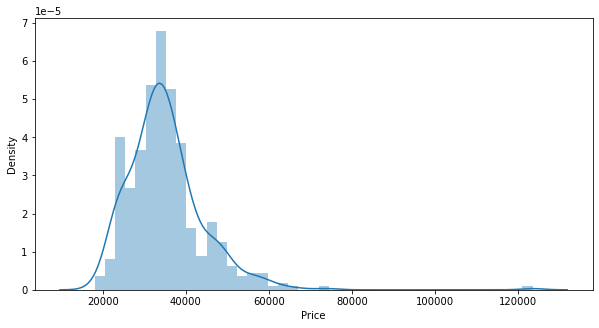

In [1055]:
#Price distribution 
plt.figure(figsize=(10,5))
sns.distplot(ac["Price"])

The Above Distplot shows The distribution of Price. The distplot shows the Histogram of the price value Range.

<Figure size 720x360 with 0 Axes>

<AxesSubplot:ylabel='Price'>

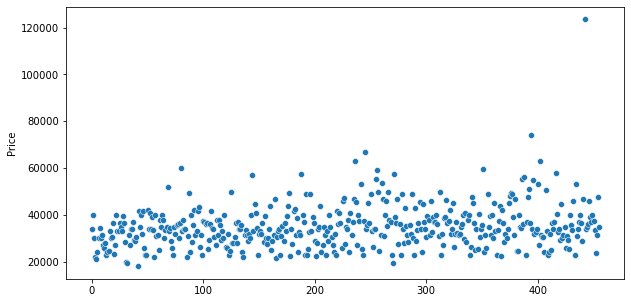

In [1056]:
#price range using scatter plot
plt.figure(figsize=(10,5))
sns.scatterplot(x=ac.index,y="Price",data=ac)

The Above Scatter-plot,we can see the scattered range of Price.
From Scatter plot, we can infer that price ranges B/W (20-45)k and above 45k can be considered as Outliers.


<Figure size 720x360 with 0 Axes>

<AxesSubplot:ylabel='Rating'>

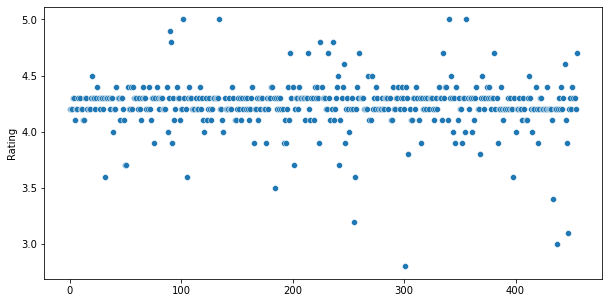

In [1058]:
#Rating analysis
plt.figure(figsize=(10,5))
sns.scatterplot(x=ac.index,y="Rating",data=ac)

From The scatter-plot shows, The Scatterd data of the Ratings.
- The Range of A/C ratings mostly lies b/w 3.8 to 4.4(Approx) Value.

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:ylabel='Brand'>

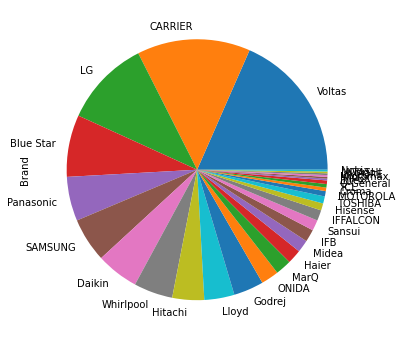

In [1059]:
#pie plot based on Brand count
plt.figure(figsize=(15,6))
ac["Brand"].value_counts().plot(kind="pie")


The Pie-plot shows,The percentages of the Brands and their A\c models available.

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:xlabel='Brand', ylabel='count'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'CARRIER'),
  Text(1, 0, 'SAMSUNG'),
  Text(2, 0, 'Midea'),
  Text(3, 0, 'MarQ'),
  Text(4, 0, 'Whirlpool'),
  Text(5, 0, 'Blue Star'),
  Text(6, 0, 'Voltas'),
  Text(7, 0, 'Lloyd'),
  Text(8, 0, 'Panasonic'),
  Text(9, 0, 'IFB'),
  Text(10, 0, 'LG'),
  Text(11, 0, 'Daikin'),
  Text(12, 0, 'Haier'),
  Text(13, 0, 'Hitachi'),
  Text(14, 0, 'ONIDA'),
  Text(15, 0, 'Sansui'),
  Text(16, 0, 'Godrej'),
  Text(17, 0, 'IFFALCON'),
  Text(18, 0, 'Hisense'),
  Text(19, 0, 'MOTOROLA'),
  Text(20, 0, 'Intex'),
  Text(21, 0, 'TOSHIBA'),
  Text(22, 0, 'Nokia'),
  Text(23, 0, 'Micromax'),
  Text(24, 0, 'Croma'),
  Text(25, 0, 'LIVPURE'),
  Text(26, 0, 'IMPEX'),
  Text(27, 0, 'O-General'),
  Text(28, 0, 'MITASHI'),
  Text(29, 0, 'TCL')])

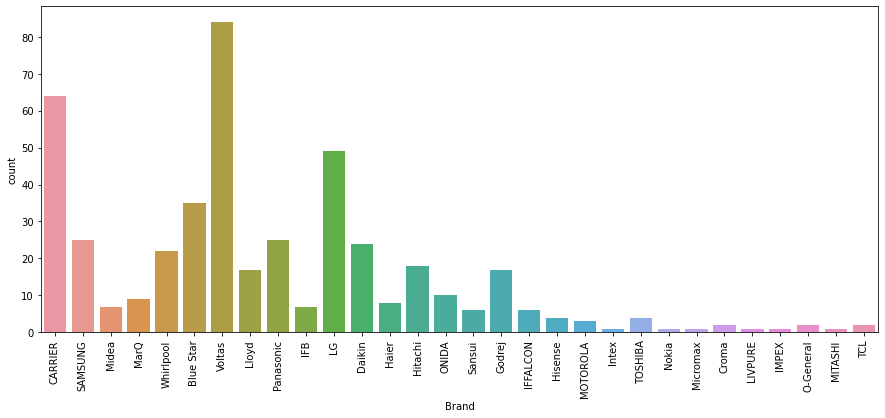

In [1060]:
#Countplot for Brand
plt.figure(figsize=(15,6))
sns.countplot(ac.Brand)
plt.xticks(rotation=90)

From above graph we can infer that count of Number of A/cs based on Brand.
- The X-axis shows all the different Brands of A/C's that are available in the market.
- The Y-axis shows the count of A/c's available by each brand.

**Bi-Variate Analysis**

In [1061]:
#Bi-varate Analysis based on Brand and price
ac.groupby(["Brand"])["Price"].agg(["mean","max","min"])

,mean,max,min
Brand,,,
Blue Star,36226.771429,55500.0,17990.0
CARRIER,35827.062500,49990.0,22990.0
Croma,24740.000000,24990.0,24490.0
Daikin,37361.333333,62990.0,22990.0
Godrej,31782.294118,52990.0,21990.0
Haier,39589.750000,123499.0,21490.0
Hisense,31115.000000,33990.0,26990.0
Hitachi,34070.388889,47499.0,24090.0
IFB,40691.285714,49990.0,31990.0


<Figure size 1080x432 with 0 Axes>

<AxesSubplot:xlabel='Brand', ylabel='Price'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 [Text(0, 0, 'Lloyd'),
  Text(1, 0, 'CARRIER'),
  Text(2, 0, 'SAMSUNG'),
  Text(3, 0, 'Midea'),
  Text(4, 0, 'Whirlpool'),
  Text(5, 0, 'Voltas'),
  Text(6, 0, 'Blue Star'),
  Text(7, 0, 'MarQ'),
  Text(8, 0, 'Panasonic'),
  Text(9, 0, 'IFB'),
  Text(10, 0, 'Haier'),
  Text(11, 0, 'Hitachi'),
  Text(12, 0, 'LG'),
  Text(13, 0, 'Daikin'),
  Text(14, 0, 'ONIDA'),
  Text(15, 0, 'Godrej'),
  Text(16, 0, 'CANDY'),
  Text(17, 0, 'Sansui'),
  Text(18, 0, 'IFFALCON'),
  Text(19, 0, 'Hisense'),
  Text(20, 0, 'MOTOROLA'),
  Text(21, 0, 'Intex'),
  Text(22, 0, 'TOSHIBA'),
  Text(23, 0, 'Nokia'),
  Text(24, 0, 'Micromax'),
  Text(25, 0, 'TCL'),
  Text(26, 0, 'Croma'),
  Text(27, 0, 'IMPEX'),
  Text(28, 0, 'MITASHI')])

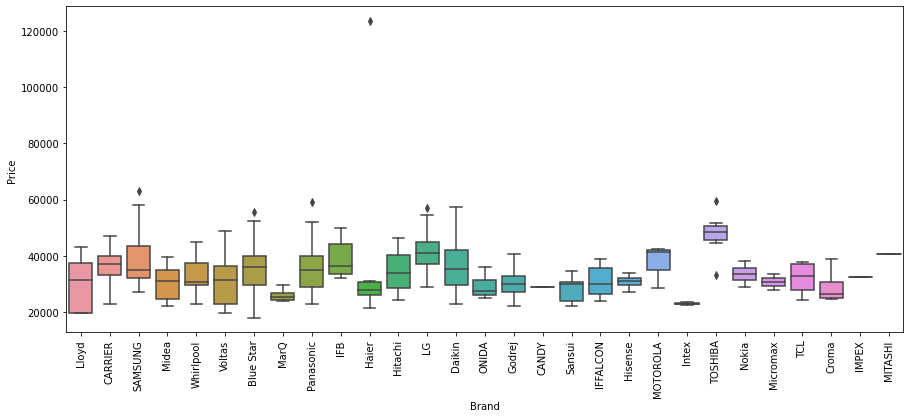

In [816]:
#Avg price based on Brand
plt.figure(figsize=(15,6))
sns.boxplot(x="Brand", y="Price", data=ac)
plt.xticks(rotation=90)

From Above boxplot, we can infer that The price range of each brand lies b/w.
- The x-axis shows the prices of A/c's.
- The Y-axis shows the Brand Names of A/c's.
- The boc contains mainly 

<Figure size 1080x360 with 0 Axes>

<AxesSubplot:xlabel='Brand', ylabel='Price'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'CARRIER'),
  Text(1, 0, 'SAMSUNG'),
  Text(2, 0, 'Midea'),
  Text(3, 0, 'MarQ'),
  Text(4, 0, 'Whirlpool'),
  Text(5, 0, 'Blue Star'),
  Text(6, 0, 'Voltas'),
  Text(7, 0, 'Lloyd'),
  Text(8, 0, 'Panasonic'),
  Text(9, 0, 'IFB'),
  Text(10, 0, 'LG'),
  Text(11, 0, 'Daikin'),
  Text(12, 0, 'Haier'),
  Text(13, 0, 'Hitachi'),
  Text(14, 0, 'ONIDA'),
  Text(15, 0, 'Sansui'),
  Text(16, 0, 'Godrej'),
  Text(17, 0, 'IFFALCON'),
  Text(18, 0, 'Hisense'),
  Text(19, 0, 'MOTOROLA'),
  Text(20, 0, 'Intex'),
  Text(21, 0, 'TOSHIBA'),
  Text(22, 0, 'Nokia'),
  Text(23, 0, 'Micromax'),
  Text(24, 0, 'Croma'),
  Text(25, 0, 'LIVPURE'),
  Text(26, 0, 'IMPEX'),
  Text(27, 0, 'O-General'),
  Text(28, 0, 'MITASHI'),
  Text(29, 0, 'TCL')])

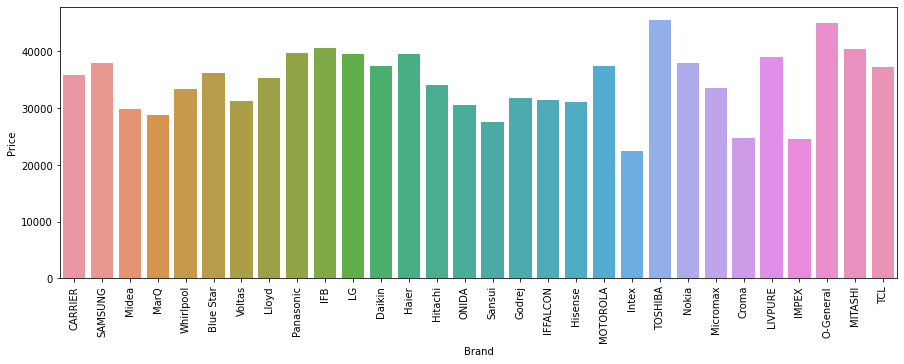

In [1062]:
#Avg of price based on Brand
plt.figure(figsize=(15,5))
sns.barplot(x="Brand", y="Price",ci=None,data=ac)
plt.xticks(rotation=90)

From above bar-graph,we can infer that the Average prices of A/Cs based on the Brand.
- The Tallest bar among in the graph shows that the Brand's Avg value is high.
- The lowest bar among in the graph defines the avg price of that brand is less such as Intex in this case.

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:xlabel='Rating', ylabel='Price'>

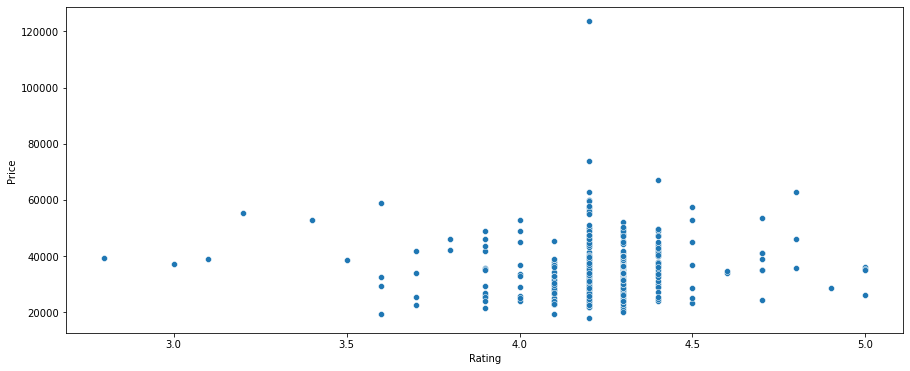

In [1063]:
#based on Ratings and prices
plt.figure(figsize=(15,6))
sns.scatterplot(x="Rating", y="Price", data=ac)

The above scatter-plot is to describe the Ratings and prices of A\c's based on the Ratings.
- Most of the A\c's Ratings are 3.8 and above till 4.5


<Figure size 1080x432 with 0 Axes>

<AxesSubplot:xlabel='Type', ylabel='Price'>

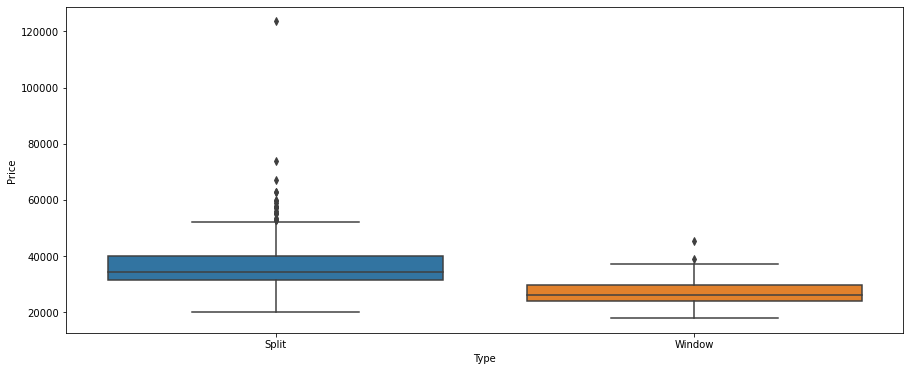

In [1064]:
plt.figure(figsize=(15,6))
sns.boxplot(x="Type",y="Price", data=ac)

From the above boxplot, We can infer that split a/c's  more expensive than Window A/c's and Split a/c's price Ranges from 20k to nearly 55k, Above 55k can be considered as outliers and window A/c's cost b/w 20k-35k, Above 35k are the outliers.

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:xlabel='Type', ylabel='Price'>

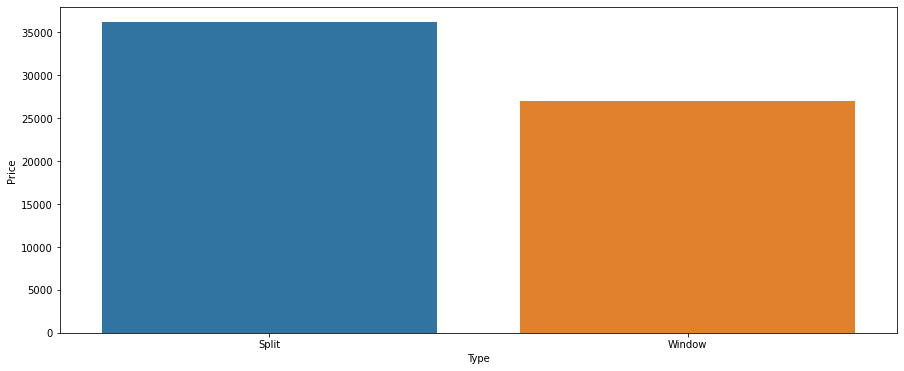

In [1065]:
#Bi-variate Analysis on Price based on Type
plt.figure(figsize=(15,6))
sns.barplot(x="Type",y="Price", data=ac, ci=None)

In [1066]:
#Bi-variate Analysis on Price based on Energy Saving
ac.groupby(["Energy Saving"])["Price"].agg(["mean"])

,mean
Energy Saving,
2 Star,25662.666667
3 Star,33065.035211
4 Star,39623.894737
5 Star,38599.873333


<AxesSubplot:xlabel='Energy Saving', ylabel='Price'>

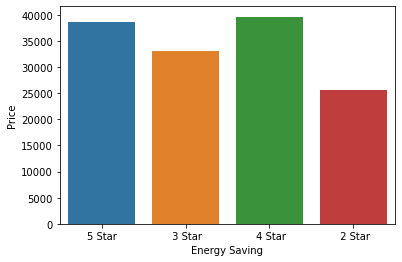

In [1067]:
#Bar plot for Energy saving 
sns.barplot(ac["Energy Saving"], ac["Price"], ci=None)

From above bar-graph,The Energy-savings Ranges from 2star to 5 star.
- The Blue bar refers to 5-Star.
- The Green bar refers to 4-Star.
- The Orange bar refers to 3-Star.
- The red bar refers to 2- Star.
- The x-axis shows the Energy Saving and the Y-axis shows the price range.

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:xlabel='Noise Level', ylabel='Price'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, ' 32 dB'),
  Text(1, 0, ' 38 dB'),
  Text(2, 0, ' 52 dB'),
  Text(3, 0, ' 39 dB'),
  Text(4, 0, ' 32.5 db'),
  Text(5, 0, ' 33 dB'),
  Text(6, 0, ' 43 dB'),
  Text(7, 0, ' 40 dB'),
  Text(8, 0, ' 54 dB'),
  Text(9, 0, ' 42 dB'),
  Text(10, 0, ' 36 dB'),
  Text(11, 0, ' 46 dB'),
  Text(12, 0, ' 44 dB'),
  Text(13, 0, ' 58 dB'),
  Text(14, 0, ' 45 dB'),
  Text(15, 0, ' 47 dB'),
  Text(16, 0, ' 53 dB'),
  Text(17, 0, ' 62.5 dB'),
  Text(18, 0, ' 35 db'),
  Text(19, 0, ' 26 dB'),
  Text(20, 0, ' 34 dB'),
  Text(21, 0, ' 35 dB'),
  Text(22, 0, ' 29 dB'),
  Text(23, 0, ' 38 db'),
  Text(24, 0, ' 31 dB'),
  Text(25, 0, ' 21 dB'),
  Text(26, 0, ' 45 db'),
  Text(27, 0, ' 37 dB'),
  Text(28, 0, ' 60 dB'),
  Text(29, 0, ' 44 db'),
  Text

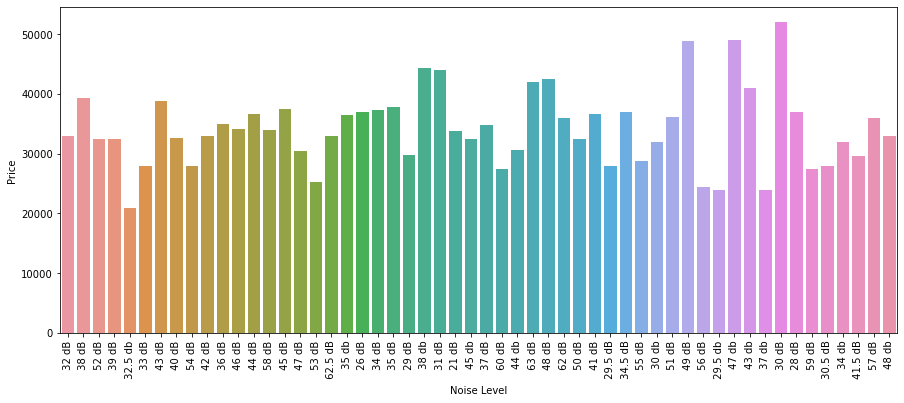

In [1068]:
plt.figure(figsize=(15,6))
sns.barplot(x="Noise Level", y="Price",ci=None,data=ac)
plt.xticks(rotation=90)

- The above bar-graph shows the information about Price based on the Noise-level.



### Multi-Variate Analysis

In [1069]:
#A/c's Price based on The Brand and Wi-Fi
ac.groupby(["Brand","Wi-Fi"])["Price"].agg(["mean"])

mean
Brand     Wi-Fi               
Blue Star No      36226.771429
CARRIER   No      35827.062500
Croma     No      24740.000000
Daikin    No      37361.333333
Godrej    No      31782.294118
Haier     No      27602.714286
          Yes    123499.000000
Hisense   Yes     31115.000000
Hitachi   No      34070.388889
IFB       No      40691.285714
IFFALCON  No      30994.500000
          Yes     31740.000000
IMPEX     No      24589.000000
Intex     No      22490.000000
LG        No      38938.809524
          Yes     43550.000000
LIVPURE   Yes     38990.000000
Lloyd     No      31366.615385
          Yes     47990.000000
MITASHI   No      40499.000000
MOTOROLA  No      28490.000000
          Yes     41990.000000
MarQ      No      28824.333333
Micromax  No      33490.000000
Midea     No      29775.714286
Nokia     Yes     37990.000000
O-General No      45025.000000
ONIDA     No      30374.625000
          Yes     30990.000000
Panasonic No      40360.200000
          Yes     38680.900000
SAMSUNG   No      38051.360000
Sansui    No      26191.800000
          Yes     34490.000000
TCL       No      37224.000000
TOSHIBA   No      45619.500000
Voltas    No      31207.690476
Whirlpool No      33364.681818

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:xlabel='Brand', ylabel='Price'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'Lloyd'),
  Text(1, 0, 'MarQ'),
  Text(2, 0, 'Voltas'),
  Text(3, 0, 'Midea'),
  Text(4, 0, 'Whirlpool'),
  Text(5, 0, 'SAMSUNG'),
  Text(6, 0, 'Blue Star'),
  Text(7, 0, 'Hitachi'),
  Text(8, 0, 'Haier'),
  Text(9, 0, 'Panasonic'),
  Text(10, 0, 'LG'),
  Text(11, 0, 'Daikin'),
  Text(12, 0, 'ONIDA'),
  Text(13, 0, 'CARRIER'),
  Text(14, 0, 'IFB'),
  Text(15, 0, 'Sansui'),
  Text(16, 0, 'IFFALCON'),
  Text(17, 0, 'Godrej'),
  Text(18, 0, 'MOTOROLA'),
  Text(19, 0, 'Intex'),
  Text(20, 0, 'LIVPURE'),
  Text(21, 0, 'Hisense'),
  Text(22, 0, 'CANDY'),
  Text(23, 0, 'Nokia'),
  Text(24, 0, 'TOSHIBA'),
  Text(25, 0, 'MITASHI'),
  Text(26, 0, 'Micromax'),
  Text(27, 0, 'O-General'),
  Text(28, 0, 'Croma'),
  Text(29, 0, 'TCL'),
  Text(30, 0, 'LumX')])

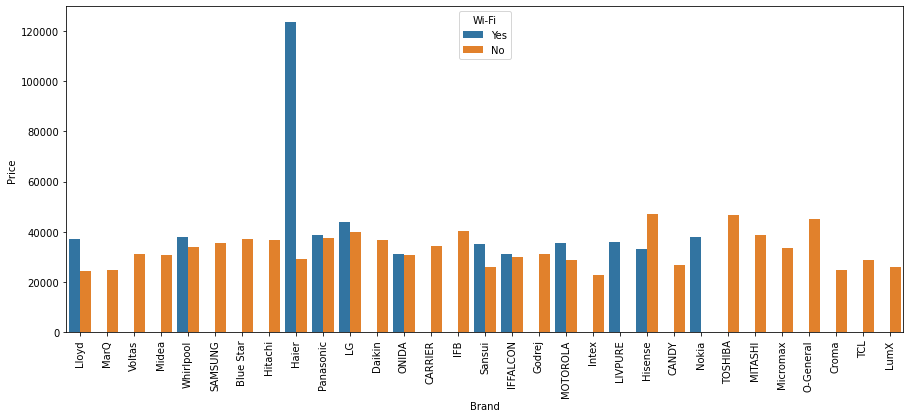

In [607]:
#plot for Brand and pice based on Wi-fi
plt.figure(figsize=(15,6))
sns.barplot(x="Brand", y="Price",ci=None, hue="Wi-Fi", data=ac)
plt.xticks(rotation=90)

The Barplot above infers to the Air-Conditioners Brands and their prices basedon which  A/c's having Wi-Fi and which do not. 
- The Blue bar shows the Brands which have Wi-Fi.
- The Orange bar shows the Brands which do not have Wi-fi.
- The x-axis refers to the prices and Y-axis refers to Brands.
- By looking into the above graph,The insights are: 
- The Ac's containing Wi-fi are expensive compare to the A/c' which do not have Wi-Fi.

In [1070]:
#The Average price based on Brand and Energy saving
ac.groupby(["Brand","Energy Saving"])["Price"].agg(["mean"])
    

mean
Brand     Energy Saving              
Blue Star  3 Star        33523.428571
           4 Star        37990.000000
          5 Star         40458.076923
CARRIER    3 Star        33221.791667
          5 Star         37390.225000
Croma      3 Star        24740.000000
Daikin     3 Star        32783.111111
           4 Star        48499.000000
          5 Star         52394.500000
Godrej     3 Star        29392.181818
          5 Star         36164.166667
Haier      3 Star        39589.750000
Hisense    3 Star        29240.000000
          5 Star         32990.000000
Hitachi    3 Star        33153.700000
           4 Star        35145.000000
          5 Star         35240.000000
IFB        3 Star        40558.166667
          5 Star         41490.000000
IFFALCON   3 Star        31191.800000
          5 Star         32990.000000
IMPEX      3 Star        24589.000000
Intex      3 Star        22490.000000
LG         3 Star        38360.375000
           4 Star        37395.428571
          5 Star         42103.500000
LIVPURE    3 Star        38990.000000
Lloyd      3 Star        33438.428571
          5 Star         43862.666667
MITASHI    3 Star        40499.000000
MOTOROLA   3 Star        35490.000000
          5 Star         41490.000000
MarQ       3 Star        28277.000000
          5 Star         30740.000000
Micromax   3 Star        33490.000000
Midea      3 Star        27690.000000
          5 Star         34990.000000
Nokia     5 Star         37990.000000
O-General  3 Star        45025.000000
ONIDA      3 Star        29499.625000
          5 Star         34490.000000
Panasonic  3 Star        36830.875000
           4 Star        49990.000000
          5 Star         44116.000000
SAMSUNG    3 Star        36928.357143
           4 Star        38163.800000
          5 Star         40578.000000
Sansui     2 Star        22499.000000
           3 Star        27115.000000
          5 Star         34490.000000
TCL        3 Star        37224.000000
TOSHIBA    3 Star        33744.500000
          5 Star         57494.500000
Voltas     2 Star        27244.500000
           3 Star        29503.315789
          5 Star         35410.720000
Whirlpool  3 Star        33305.600000
           4 Star        44999.000000
          5 Star         31573.333333

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:xlabel='Brand', ylabel='Price'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'CARRIER'),
  Text(1, 0, 'SAMSUNG'),
  Text(2, 0, 'Midea'),
  Text(3, 0, 'MarQ'),
  Text(4, 0, 'Whirlpool'),
  Text(5, 0, 'Blue Star'),
  Text(6, 0, 'Voltas'),
  Text(7, 0, 'Lloyd'),
  Text(8, 0, 'Panasonic'),
  Text(9, 0, 'IFB'),
  Text(10, 0, 'LG'),
  Text(11, 0, 'Daikin'),
  Text(12, 0, 'Haier'),
  Text(13, 0, 'Hitachi'),
  Text(14, 0, 'ONIDA'),
  Text(15, 0, 'Sansui'),
  Text(16, 0, 'Godrej'),
  Text(17, 0, 'IFFALCON'),
  Text(18, 0, 'Hisense'),
  Text(19, 0, 'MOTOROLA'),
  Text(20, 0, 'Intex'),
  Text(21, 0, 'TOSHIBA'),
  Text(22, 0, 'Nokia'),
  Text(23, 0, 'Micromax'),
  Text(24, 0, 'Croma'),
  Text(25, 0, 'LIVPURE'),
  Text(26, 0, 'IMPEX'),
  Text(27, 0, 'O-General'),
  Text(28, 0, 'MITASHI'),
  Text(29, 0, 'TCL')])

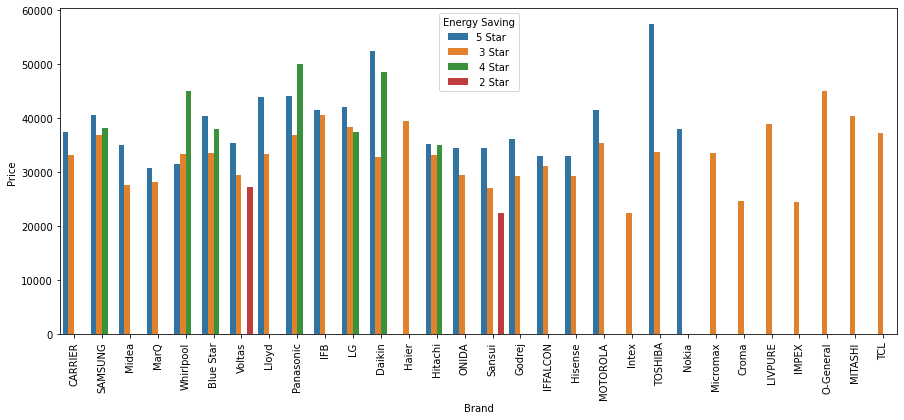

In [1071]:
#The Average price based on Brand and Energy saving
plt.figure(figsize=(15,6))
sns.barplot(x="Brand",y="Price", hue="Energy Saving", data=ac, ci=None)
plt.xticks(rotation=90)

The above bar-graph shows the A/c's Prices based on the Brands and their Energy savings,from the graph we can infer that the Prices of Ac's with 5-Star Energy savings are slightly expensive while compare to other Energy saving Ratings.
- The Blue-bar refers to 5-star 
- The Green refers to 4-star
- The Orange refers to 3-star 
- The Red refers 2-Star

- From the graph we can see that almost all the Brands have Blue and Orange bar hence Most of the A/c's Brand are either 5-star or 3-Star. 
  

In [1076]:
#Price Based on Brand and Rating.
ac.groupby(["Brand","Rating"])["Price"].agg(["mean"])

mean
Brand     Rating              
Blue Star 3.2     55500.000000
          3.9     44893.333333
          4.0     42949.500000
          4.1     36990.000000
          4.2     29479.750000
...                        ...
Whirlpool 4.1     25990.000000
          4.2     32951.384615
          4.3     47999.000000
          4.5     44999.000000
          4.6     34699.000000

[112 rows x 1 columns]

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:xlabel='Rating', ylabel='Price'>

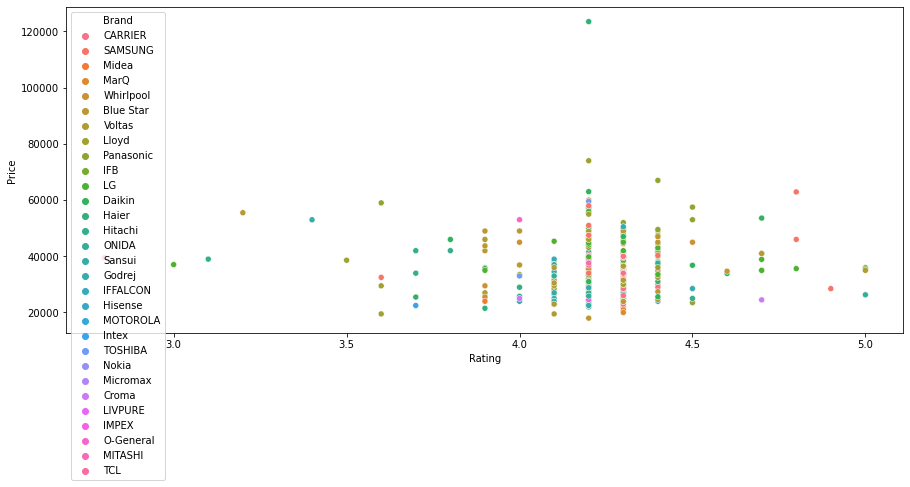

In [1077]:
plt.figure(figsize=(15,6))
sns.scatterplot(x="Rating", y="Price",hue="Brand",data=ac)

The scatter-plot, shows the Analysis of price based on the Brand and Rating. As we can see from the above plot
- The x-axis shows the Rating values.
- The y-axis shows the Price values.
The Ratings and prices values are scattered based on the brands.as we can see there are multiple colors assigned tothe brand by using hue. From the above graph we can see that most of the brand ratings lies above 3.8-4.8 (approx).

### Conclusion

Based on The Problem Statement,I have retrived Air conditioners data from flipkart using web scraping,I have performed different types of analysis and Here are the List of wide range of Air-Conditioners That are available to choose from.

In [ ]:

ac1=ac.loc[(ac["Price"]<40000)&(ac["Energy Saving"]=="5 Star")&(ac["Type"]=="Split")&(ac["Capacity"]==" 1.5 Ton")&(ac["Rating"]>4.2),:]

In [ ]:
ac1

In [1121]:
ac.to_csv("C:\\Users\\pruthvi ch\\Air_Conditioners1.csv")